# 0. Content

This script contains the following time series analysis procedures:
+ wrangling and subsetting data
+ setting idex according to date
+ Visual analysis of Stationarity
+ Data decomposition
+ Dickey_fuller test for Stationarity 
+ Standarization through differencing
+ Autocorrelation analysis

# 1. Importing Libraries and Data

In [48]:
# importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings 
from cycler import cycler
from datetime import datetime
import statsmodels.api as sm

In [49]:
# disabling warnnings 
warnings.filterwarnings("ignore")

In [50]:
# setting plot style
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['navy'])

In [51]:
# automatically show plots
%matplotlib inline

In [52]:
# creating main path
path = r'C:\Users\muffi\OneDrive\CareerFoundry\World Happiness Index Analysis 2023'

In [53]:
# importing World Happiness Report merged df
df_whia = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_years_merged.csv'))
df_whia.shape

(1859, 14)

# 2. Visual Inspection of Stationarity

In [54]:
df_whia.head()

,Unnamed: 0,country,region,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score,gdp_usd,gdp_capita_usd,population
0,0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,1.010931e+10,364.663542,2.772228e+07
1,1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,1.241616e+10,437.268740,2.839481e+07
2,2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,1.585668e+10,543.306526,2.918551e+07
3,3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,1.780511e+10,591.190030,3.011741e+07
4,4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,1.990732e+10,638.845852,3.116138e+07


## 2.1. Wrangling and Subseting 

In [8]:
# checing columns
df_whia.columns

Index(['Unnamed: 0', 'year', 'happiness_score', 'log_gdp_score',
       'social_support_score', 'life_expectancy_at_birth', 'freedom_score',
       'generosity_score', 'corruption_score', 'gdp_usd', 'gdp_capita_usd',
       'population'],
      dtype='object')

In [55]:
# drop unnamed, country name, region, and population
df_whia_rel = df_whia.drop(columns = ['Unnamed: 0', 'country', 'region', 'population'])

In [56]:
# checking columns
df_whia_rel.columns

Index(['year', 'happiness_score', 'log_gdp_score', 'social_support_score',
       'life_expectancy_at_birth', 'freedom_score', 'generosity_score',
       'corruption_score', 'gdp_usd', 'gdp_capita_usd'],
      dtype='object')

In [57]:
# snapshot of df
df_whia_rel.head()

,year,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score,gdp_usd,gdp_capita_usd
0,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,1.010931e+10,364.663542
1,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,1.241616e+10,437.268740
2,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,1.585668e+10,543.306526
3,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,1.780511e+10,591.190030
4,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,1.990732e+10,638.845852


In [58]:
# creating world averages 
df_sub = df_whia_rel.groupby('year').agg({'happiness_score':['mean'], 
                                            'log_gdp_score':['mean'], 
                                            'social_support_score':['mean'],
                                            'life_expectancy_at_birth':['mean'], 
                                            'freedom_score':['mean'], 
                                            'generosity_score':['mean'],
                                            'corruption_score':['mean'], 
                                            'gdp_usd':['mean'], 
                                            'gdp_capita_usd':['mean']})

In [59]:
# checking new df
df_sub.head()

,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score,gdp_usd,gdp_capita_usd
,mean,mean,mean,mean,mean,mean,mean,mean,mean
year,,,,,,,,,
2005,6.520070,10.227259,0.901785,67.217391,0.828878,0.010876,0.712394,9.805092e+11,23368.532534
2006,5.178841,9.017771,0.833216,59.780750,0.733488,0.002766,0.753070,3.192610e+11,9584.741083
2007,5.436653,9.194647,0.808781,61.516716,0.692376,0.012341,0.787356,5.110201e+11,10613.865755
2008,5.459385,9.158063,0.787268,60.984434,0.693788,0.021365,0.764754,5.641483e+11,14152.255460
2009,5.502089,9.309361,0.820121,62.721319,0.690621,-0.003424,0.763477,5.071872e+11,12943.130407


In [60]:
# makign sure it's a df
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2005 to 2021
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (happiness_score, mean)           17 non-null     float64
 1   (log_gdp_score, mean)             17 non-null     float64
 2   (social_support_score, mean)      17 non-null     float64
 3   (life_expectancy_at_birth, mean)  17 non-null     float64
 4   (freedom_score, mean)             17 non-null     float64
 5   (generosity_score, mean)          17 non-null     float64
 6   (corruption_score, mean)          17 non-null     float64
 7   (gdp_usd, mean)                   17 non-null     float64
 8   (gdp_capita_usd, mean)            17 non-null     float64
dtypes: float64(9)
memory usage: 1.3 KB


## 2.2. Setting the Data as the Index

In [61]:
# creating a datetime col from the year
df_sub['date'] = np.arange(2005, 2022, 1)

In [62]:
df_sub['datetime'] = pd.to_datetime(df_sub['date'], format='%Y')

In [63]:
# set the datetime as the index
df_sub = df_sub.set_index('datetime')

In [64]:
# drop the year col
df_sub.drop(columns = [ 'date'], inplace=True)

In [65]:
# checking the index 
df_sub.head(100)

,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score,gdp_usd,gdp_capita_usd
,mean,mean,mean,mean,mean,mean,mean,mean,mean
datetime,,,,,,,,,
2005-01-01,6.520070,10.227259,0.901785,67.217391,0.828878,0.010876,0.712394,9.805092e+11,23368.532534
2006-01-01,5.178841,9.017771,0.833216,59.780750,0.733488,0.002766,0.753070,3.192610e+11,9584.741083
2007-01-01,5.436653,9.194647,0.808781,61.516716,0.692376,0.012341,0.787356,5.110201e+11,10613.865755
2008-01-01,5.459385,9.158063,0.787268,60.984434,0.693788,0.021365,0.764754,5.641483e+11,14152.255460
2009-01-01,5.502089,9.309361,0.820121,62.721319,0.690621,-0.003424,0.763477,5.071872e+11,12943.130407
2010-01-01,5.500975,9.383516,0.827932,62.755807,0.711969,0.005430,0.755926,5.363380e+11,14491.754669
2011-01-01,5.456457,9.303153,0.806033,61.993446,0.734354,-0.017920,0.755429,5.106846e+11,14758.705741
2012-01-01,5.488865,9.421068,0.812938,63.133021,0.716946,-0.001875,0.755991,5.524920e+11,16260.855534


## 2.3 Ploting the Line Graph

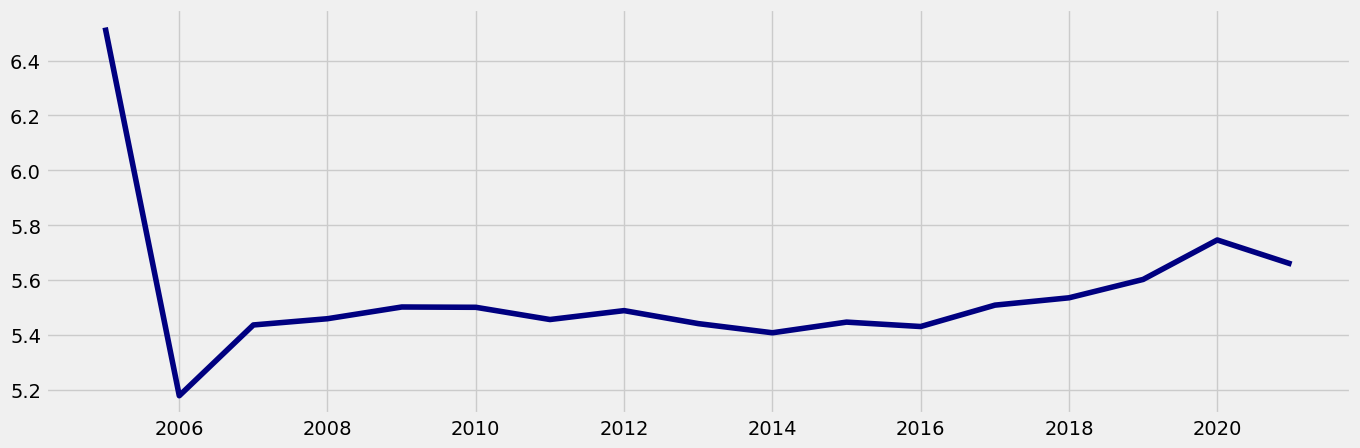

In [66]:
# creating happiness time series line chart
plt.figure(figsize = (15,5))
plt.plot(df_sub['happiness_score'])

## 2.4. Decomposing the Components

In [67]:
# decomposing using the additive model
decomp = sm.tsa.seasonal_decompose(df_sub['happiness_score'], model = 'additive')

In [68]:
# setting the figure size
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

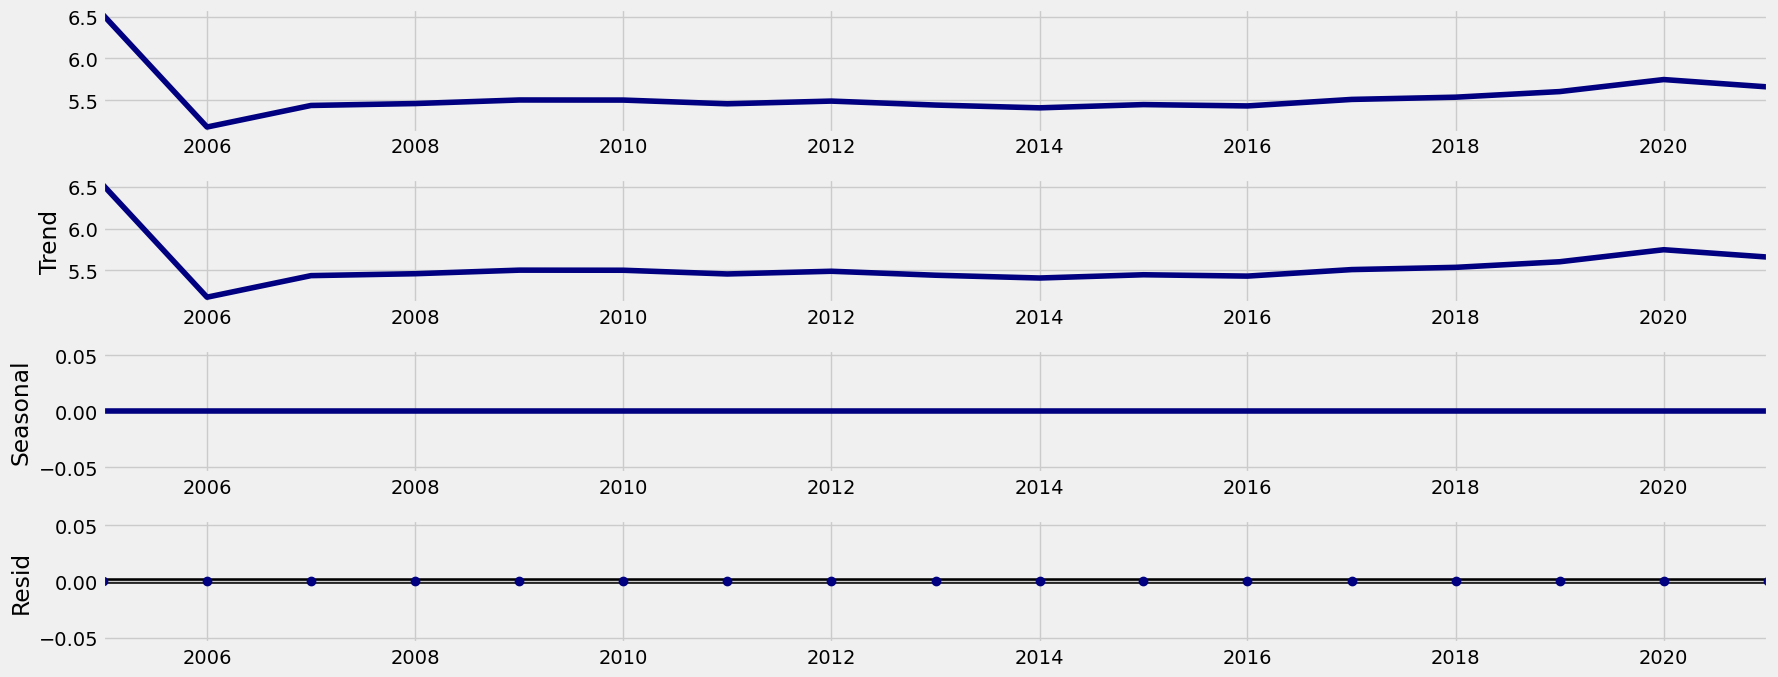

In [69]:
# plotting the decomposed components 
decomp.plot()
plt.show()

Aside from a major drop from 2005 to 2006, the importmation seems relatively stationary. In addition, there is virtually no seasonality or noise. Thus the trend line looks the same as the level

# 3. Dickey-Fuller Test for Stationarity

In [70]:
# importing library
from statsmodels.tsa.stattools import adfuller 

In [71]:
# creating dickey_fuller function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

In [72]:
# applying dickey_fuller func
dickey_fuller(df_sub['happiness_score'])

Dickey-Fuller Stationarity Test:
Test Statistic                 -0.568983
p-value                         0.877838
Number of Lags Used             3.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


###### null hypothesis: There is a unit root

The test statistics is greater than the critical values; thus, the null hypothesis cannot be rejected. I will conduct a round of differencing and try again.

## 3.2. Differencing Round 1

In [73]:
# returning t - 1
df_diff = df_sub['happiness_score'] -df_sub['happiness_score'].shift(1)

In [74]:
# dropping nan values
df_diff.dropna(inplace = True)

In [75]:
# checking the df
df_diff.head()

,mean
datetime,
2006-01-01,-1.341230
2007-01-01,0.257812
2008-01-01,0.022732
2009-01-01,0.042705
2010-01-01,-0.001115


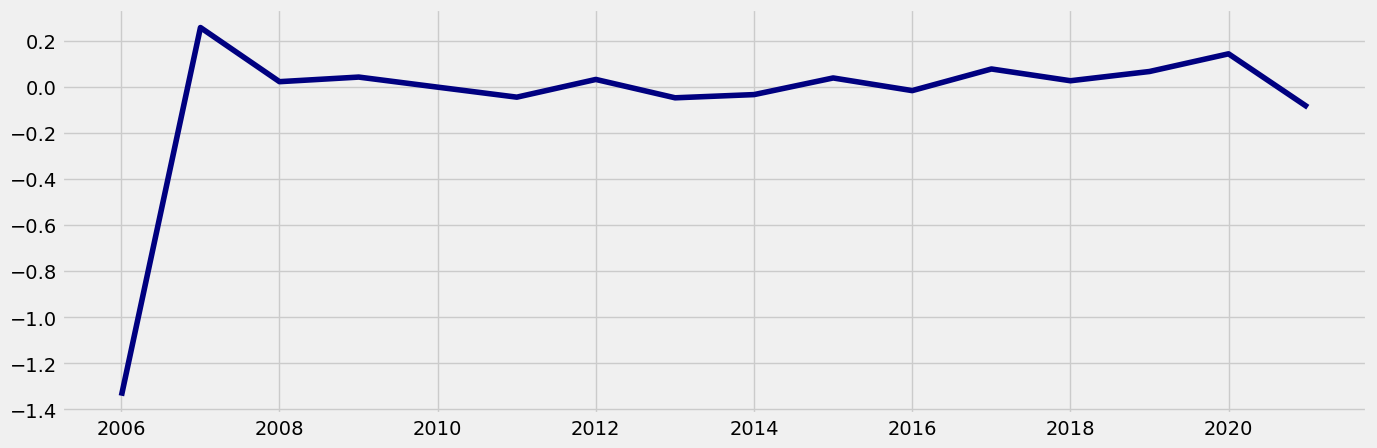

In [76]:
# checking stationarity visually
plt.figure(figsize = (15,5))
plt.plot(df_diff)

In [77]:
# checking stationarity analytically
dickey_fuller(df_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                -3.571529
p-value                        0.006329
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


The test statistics is less then the 1% critical value. Meaning I can reject the null hypothesis. I will check for autocorrelation to be sure

# 4. Autocorrelation

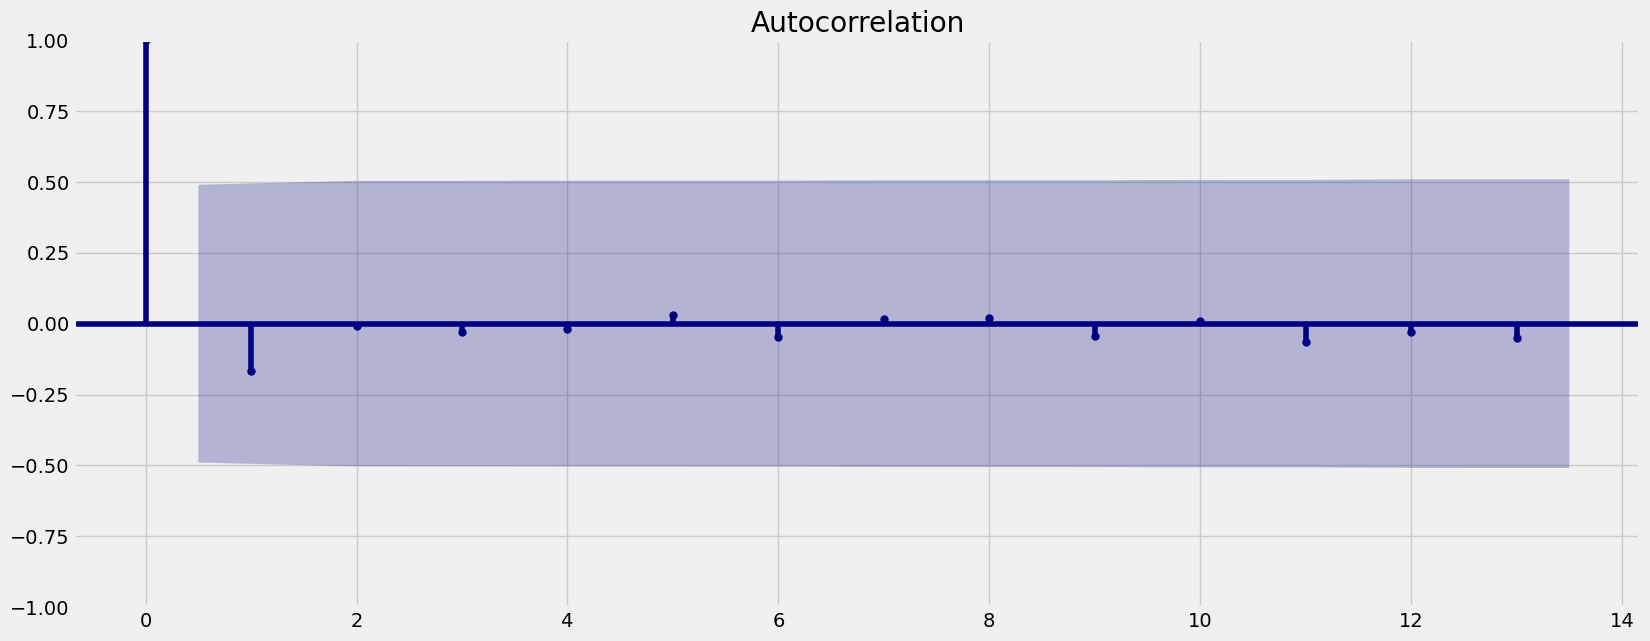

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_diff)
plt.show()

There is only one significant lag, therefore the data is stationary. 

# 5. Bonus Investigation

I suspect that something is fishy about the 2005 data. I will invesigate my suspicion in this section. 

In [79]:
# checking orginal entries to make sure there wasn't a drastic change in the number of countries reporting from 2005 to 2006
df_whia_rel['year'].value_counts()

2017    130
2011    129
2014    129
2019    128
2015    127
2016    126
2018    126
2012    124
2013    121
2010    111
2021    109
2020    103
2009    102
2008     98
2007     93
2006     80
2005     23
Name: year, dtype: int64

The number reporting countries nearly triples from 2005 to 2006. I believe it would be safe to disregard information from 2005 in this time series analysis due to the small and possible misrepresentative dataset.

## 5.1. Checking Stationarity with 2005

In [80]:
# dropping 2005
df_no_05 = df_sub.drop(labels = '2005', axis = 0)

In [81]:
# checking the new df
df_no_05

,happiness_score,log_gdp_score,social_support_score,life_expectancy_at_birth,freedom_score,generosity_score,corruption_score,gdp_usd,gdp_capita_usd
,mean,mean,mean,mean,mean,mean,mean,mean,mean
datetime,,,,,,,,,
2006-01-01,5.178841,9.017771,0.833216,59.780750,0.733488,0.002766,0.753070,3.192610e+11,9584.741083
2007-01-01,5.436653,9.194647,0.808781,61.516716,0.692376,0.012341,0.787356,5.110201e+11,10613.865755
2008-01-01,5.459385,9.158063,0.787268,60.984434,0.693788,0.021365,0.764754,5.641483e+11,14152.255460
2009-01-01,5.502089,9.309361,0.820121,62.721319,0.690621,-0.003424,0.763477,5.071872e+11,12943.130407
2010-01-01,5.500975,9.383516,0.827932,62.755807,0.711969,0.005430,0.755926,5.363380e+11,14491.754669
2011-01-01,5.456457,9.303153,0.806033,61.993446,0.734354,-0.017920,0.755429,5.106846e+11,14758.705741
2012-01-01,5.488865,9.421068,0.812938,63.133021,0.716946,-0.001875,0.755991,5.524920e+11,16260.855534
2013-01-01,5.441522,9.408813,0.809846,63.305740,0.740911,0.004211,0.754514,5.710000e+11,15364.390717


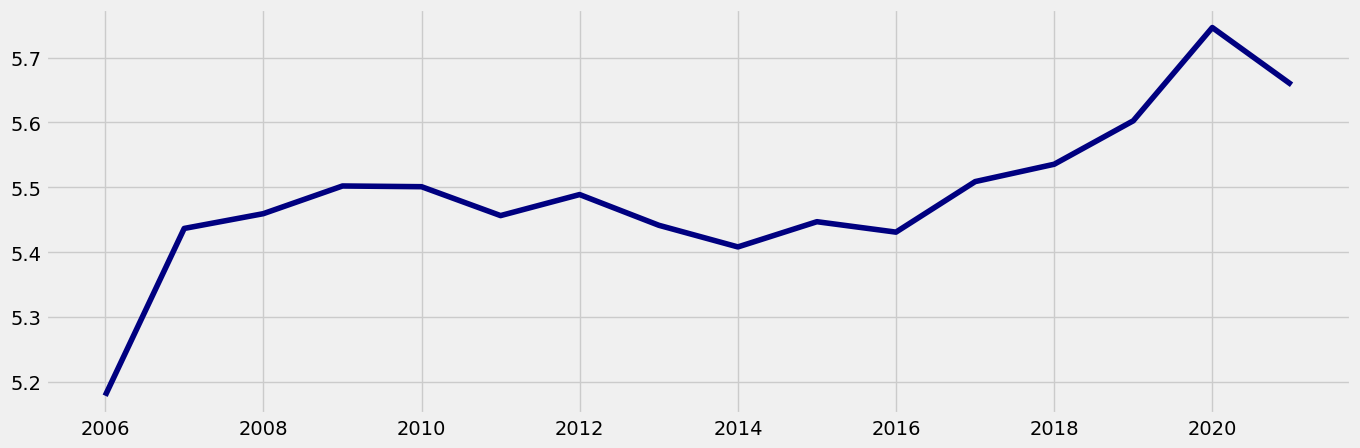

In [82]:
# visually checing the stationarity
plt.figure(figsize = (15,5))
plt.plot(df_no_05['happiness_score'])

In [83]:
# checking stationarity analytically
dickey_fuller(df_no_05['happiness_score'])

Dickey-Fuller Stationarity Test:
Test Statistic                -3.739018
p-value                        0.003597
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


The test statistic is less than the critical value for the 1% signifance level and the p-value is satisfactory. Thus, the data is stationary. I will now check for autocorrelation to ensure my data is stationary. 

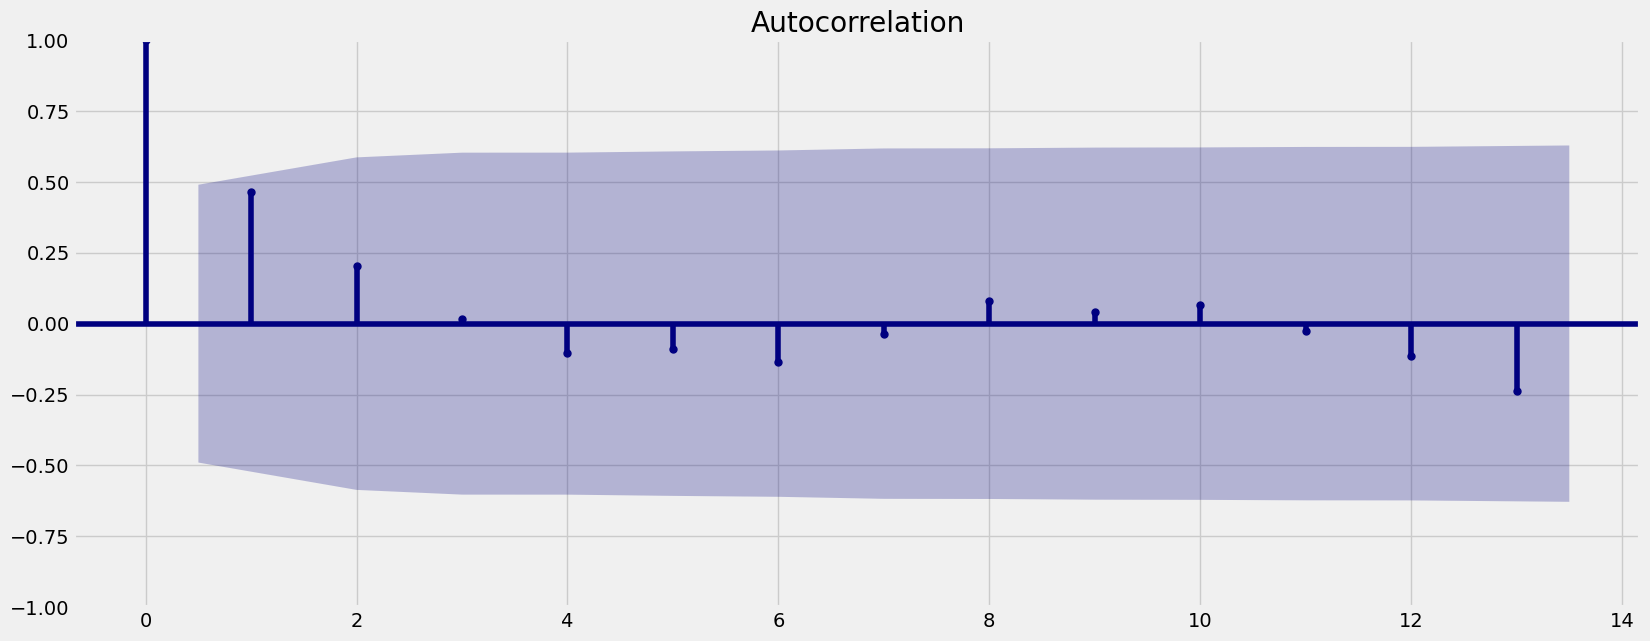

In [84]:
plot_acf(df_no_05['happiness_score'])
plt.show()

There is only 1 significant lag, so the data is stationary.

## 5.2 Checking Orginal Stationarity

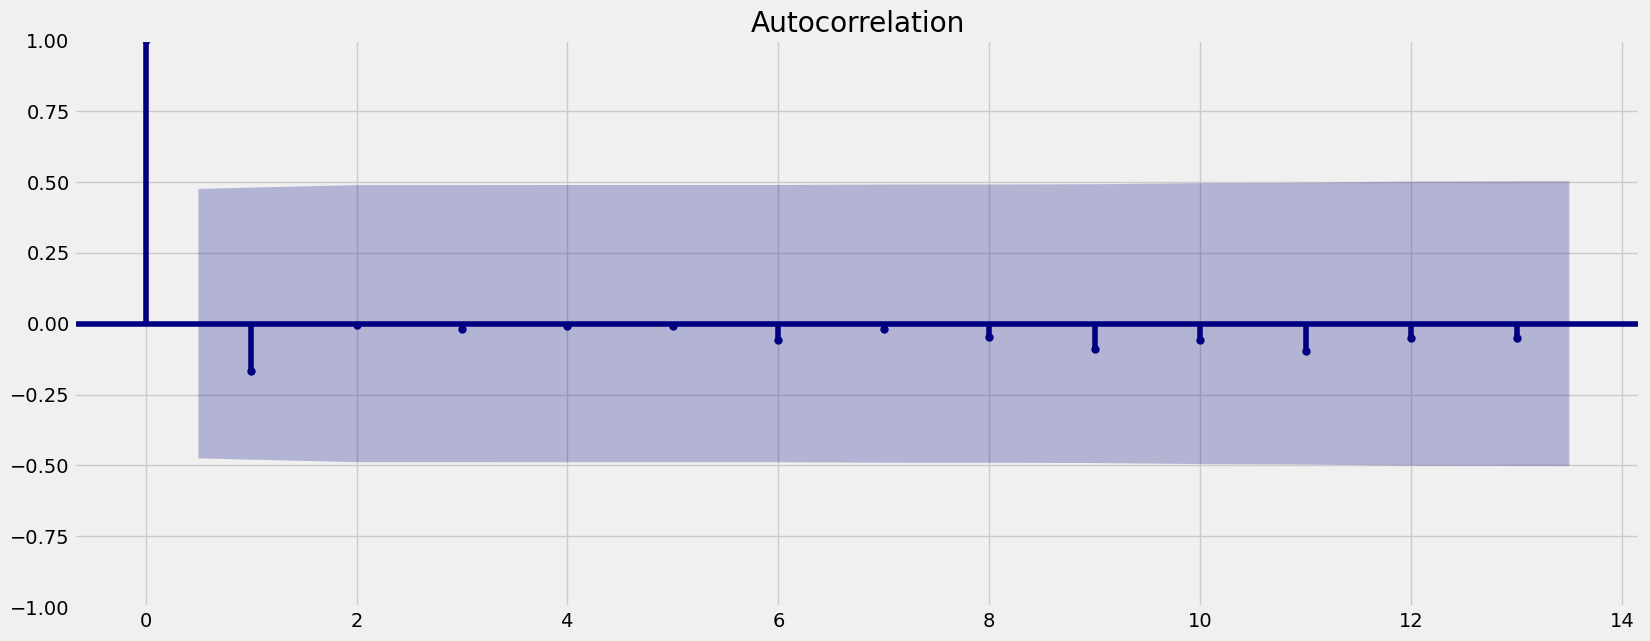

In [85]:
plot_acf(df_sub['happiness_score'])
plt.show()